train: 0.64571
test: 0.54229


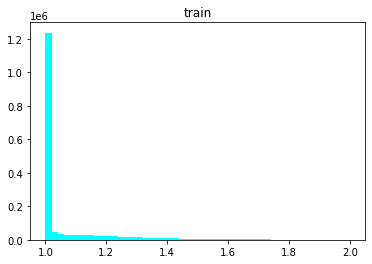

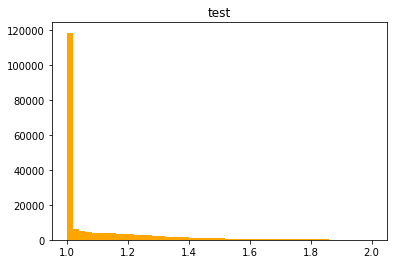

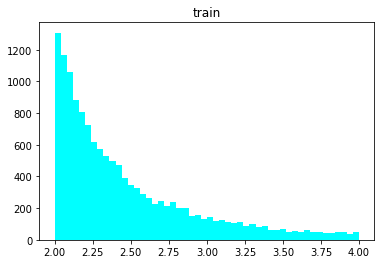

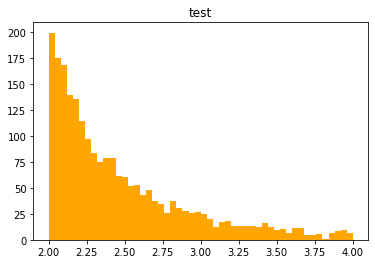

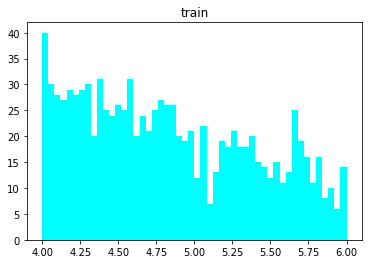

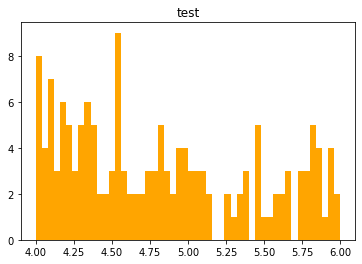

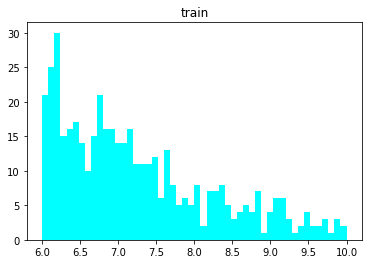

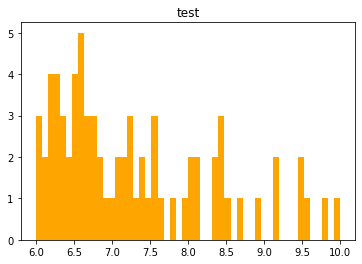

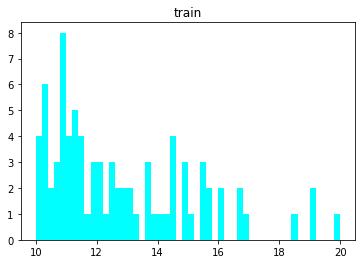

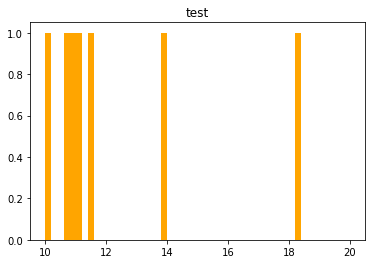

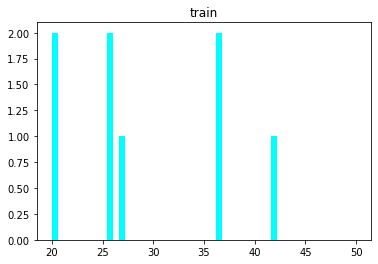

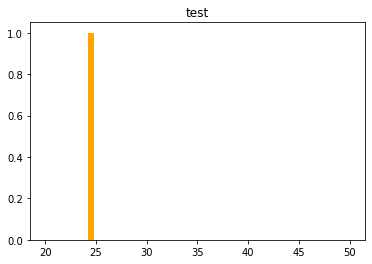

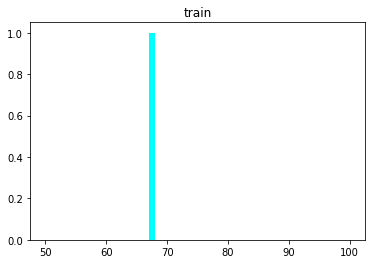

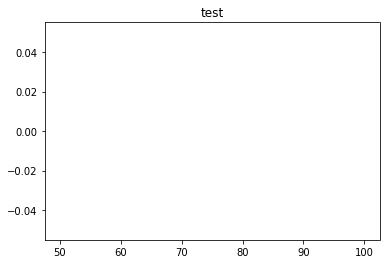

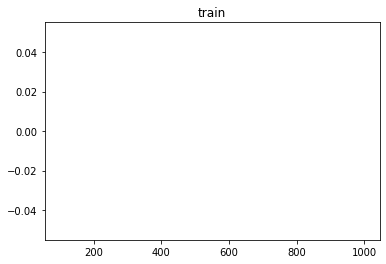

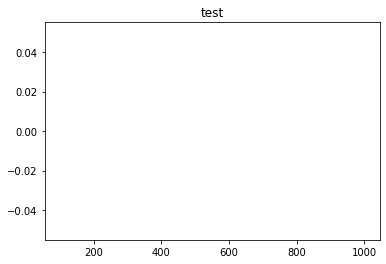

In [3]:
import matplotlib.pyplot as plt
import numpy as np


cost_predict = np.load("./data/train_cost_out.npy")
cost_optimal = np.load("./data/train_cost_optimal.npy") + 1e-3

test_cost_predict = np.load("./data/test_cost_out.npy")
test_cost_optimal = np.load("./data/test_cost_optimal.npy") + 1e-3


RANGE = 1
print(f'train: {np.count_nonzero((cost_predict / cost_optimal) <= RANGE) / float(len(cost_predict)):.5f}')
print(f'test: {np.count_nonzero((test_cost_predict/test_cost_optimal) <= RANGE)/float(len(test_cost_predict)):.5f}')


def plotComparison(_range, _bin=50):
    plt.figure()
    _ =  plt.hist(cost_predict / cost_optimal, bins=_bin, range=_range, color='cyan')
    plt.title("train")
    plt.figure()
    _ = plt.hist(test_cost_predict / test_cost_optimal, bins=_bin, range=_range, color='orange')
    plt.title("test")

plotComparison([1,2])
plotComparison([2,4])
plotComparison([4,6])
plotComparison([6,10])
plotComparison([10,20])
plotComparison([20,50])
plotComparison([50,100])
plotComparison([100,1000])

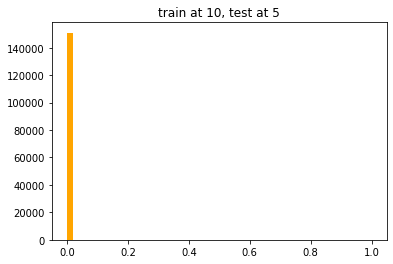

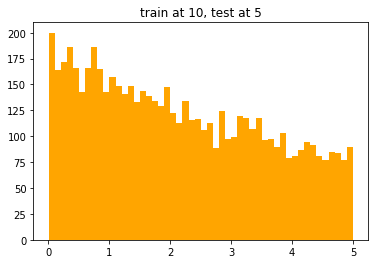

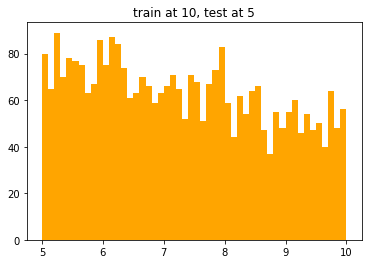

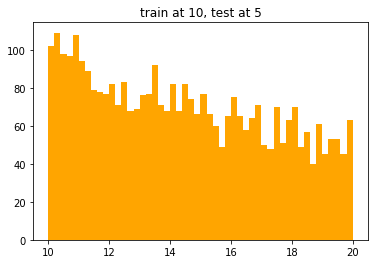

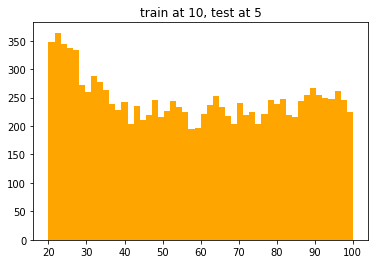

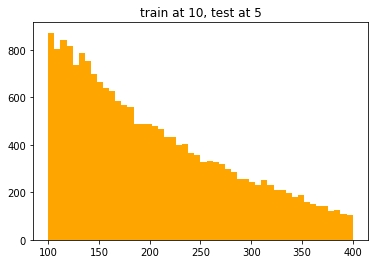

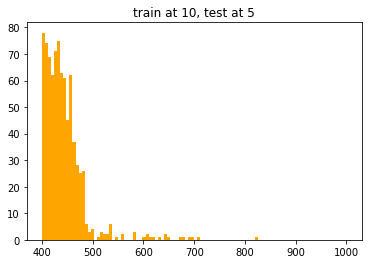

In [6]:
import matplotlib.pyplot as plt
import numpy as np


cost_predict = np.load("./data/pad_db_cost_predict_rand_half.npy")
cost_optimal = np.load("./data/pad_db_cost_optimal_rand_half.npy")



RANGE = 2
# print(f'In range: {np.count_nonzero((cost_predict / cost_optimal) <= RANGE) / float(len(cost_predict)):.5f}')


def plotComparison(_range, _bin=50):
    plt.figure()
    plt.hist(cost_predict  - cost_optimal, bins=_bin, range=_range, color='orange')
    plt.title("train at 10, test at 5")

plotComparison([0,1])
plotComparison([1e-3,5])
plotComparison([5,10])
plotComparison([10,20])
plotComparison([20,100])
plotComparison([100,400])
plotComparison([400,1000],_bin=100)